<AxesSubplot:>

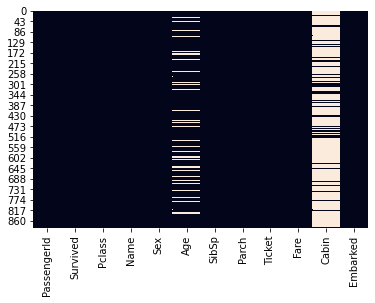

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

titanic_data=pd.read_csv("E:/2336120046/datasets/titanic.csv")
sns.heatmap(titanic_data.isnull(),cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

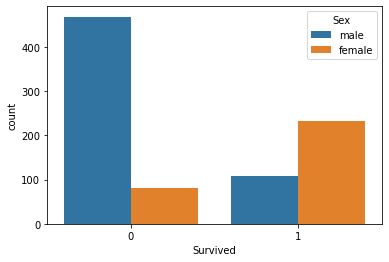

In [5]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

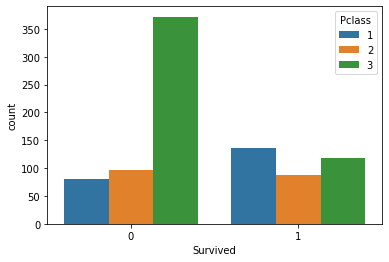

In [6]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

<AxesSubplot:>

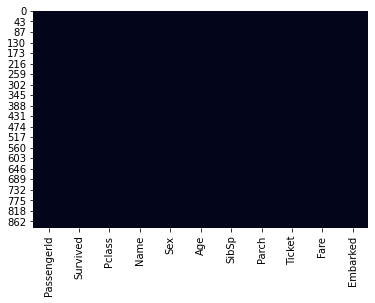

In [7]:
def get_age(row):
    if pd.isnull(row['Age']):
        same_class=titanic_data[titanic_data['Pclass']==row['Pclass']]
        return same_class['Age'].mean()
    else:
        return row['Age']

titanic_data['Age']=titanic_data[['Age','Pclass']].apply(get_age,axis=1)
titanic_data.drop('Cabin',axis=1,inplace=True)
titanic_data.dropna(inplace=True)
sns.heatmap(titanic_data.isnull(),cbar=False)
        

In [8]:
sex_data=pd.get_dummies(titanic_data['Sex']).astype(int)
embarked_data=pd.get_dummies(titanic_data['Embarked']).astype(int)
titanic_data=pd.concat([titanic_data,sex_data,embarked_data],axis=1)
titanic_data.drop(['Name','PassengerId','Ticket','Sex','Embarked'],axis=1,inplace=True)
titanic_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [9]:
X = titanic_data.drop("Survived",axis=1)
Y = titanic_data["Survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

model = LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

print("************Classification Report************\n")
print(classification_report(Y_test, predictions))

print("***********Confusion Matrix***************")
print(confusion_matrix(Y_test, predictions))

************Classification Report************

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       160
           1       0.81      0.71      0.76       107

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.82      0.82      0.81       267

***********Confusion Matrix***************
[[142  18]
 [ 31  76]]
